In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

In [8]:
countries[:5]

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)']

In [9]:
indicators[:5]

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)']

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
filter_years = [2000,2001,2002,2003,2004]

In [20]:
filter_country = random.sample(countries,2)
filter_country

['Switzerland', 'Maldives']

In [21]:
filter_indicator = random.sample(indicators,1)
filter_indicator

['Air transport, freight (million ton-km)']

In [22]:
filter_mesh = (data['CountryName'] == filter_country[0]) & (data['IndicatorName'].isin(filter_indicator)) & (data['Year'].isin(filter_years))
country1_data = data[filter_mesh]

In [23]:
country1_data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3307200,Switzerland,CHE,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2000,1971.647
3458025,Switzerland,CHE,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2001,1641.819
3612310,Switzerland,CHE,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2002,1028.307
3766117,Switzerland,CHE,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2003,1248.302
3923539,Switzerland,CHE,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2004,1089.934


In [24]:
filter_mesh = (data['CountryName'] == filter_country[1]) & (data['IndicatorName'].isin(filter_indicator)) & (data['Year'].isin(filter_years))
country2_data = data[filter_mesh]

In [25]:
country2_data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3266613,Maldives,MDV,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2000,13.170
3418228,Maldives,MDV,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2001,0.008
3571611,Maldives,MDV,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2002,0.009
3725762,Maldives,MDV,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2003,0.009
3881990,Maldives,MDV,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2004,0.011


In [26]:
filteredData1 = []
filteredData2 = []

In [29]:
while(len(filteredData1) < len(filter_years)-1):
    # pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    # how many rows are there that have this country name, this indicator, and this year.  Mesh gives bool vector
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(filter_years))
    # which rows have this condition to be true?
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    # need to print this only when our while condition is true
    if(len(filteredData1) < len(filter_years)-1):
        print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


In [30]:
indicatorsFilter

['Net flows on external debt, public and publicly guaranteed (PPG) (NFL, current US$)']

In [31]:
filteredData1

,CountryName,IndicatorName,Year,Value
3228514,El Salvador,"Net flows on external debt, public and publicl...",2000,1.910770e+08
3381385,El Salvador,"Net flows on external debt, public and publicl...",2001,5.647910e+08
3533426,El Salvador,"Net flows on external debt, public and publicl...",2002,1.118584e+09
3687902,El Salvador,"Net flows on external debt, public and publicl...",2003,3.947730e+08
3842730,El Salvador,"Net flows on external debt, public and publicl...",2004,4.391000e+07


In [34]:
while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(filter_years))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

In [35]:
filteredData2

,CountryName,IndicatorName,Year,Value
3264666,Madagascar,"Net flows on external debt, public and publicl...",2000,76234000.0
3416295,Madagascar,"Net flows on external debt, public and publicl...",2001,107815000.0
3569688,Madagascar,"Net flows on external debt, public and publicl...",2002,157535000.0
3723830,Madagascar,"Net flows on external debt, public and publicl...",2003,182341000.0
3879883,Madagascar,"Net flows on external debt, public and publicl...",2004,428226000.0


In [36]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [37]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [38]:
filteredData1

,CountryName,IndicatorName,Year,Value
3228514,El Salvador,"Net flows on external debt, public and publicl...",2000,1.910770e+08
3381385,El Salvador,"Net flows on external debt, public and publicl...",2001,5.647910e+08
3533426,El Salvador,"Net flows on external debt, public and publicl...",2002,1.118584e+09
3687902,El Salvador,"Net flows on external debt, public and publicl...",2003,3.947730e+08
3842730,El Salvador,"Net flows on external debt, public and publicl...",2004,4.391000e+07


In [39]:
filteredData2

,CountryName,IndicatorName,Year,Value
3264666,Madagascar,"Net flows on external debt, public and publicl...",2000,76234000.0
3416295,Madagascar,"Net flows on external debt, public and publicl...",2001,107815000.0
3569688,Madagascar,"Net flows on external debt, public and publicl...",2002,157535000.0
3723830,Madagascar,"Net flows on external debt, public and publicl...",2003,182341000.0
3879883,Madagascar,"Net flows on external debt, public and publicl...",2004,428226000.0


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

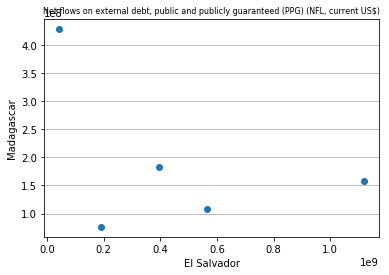

In [48]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=8)
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y)


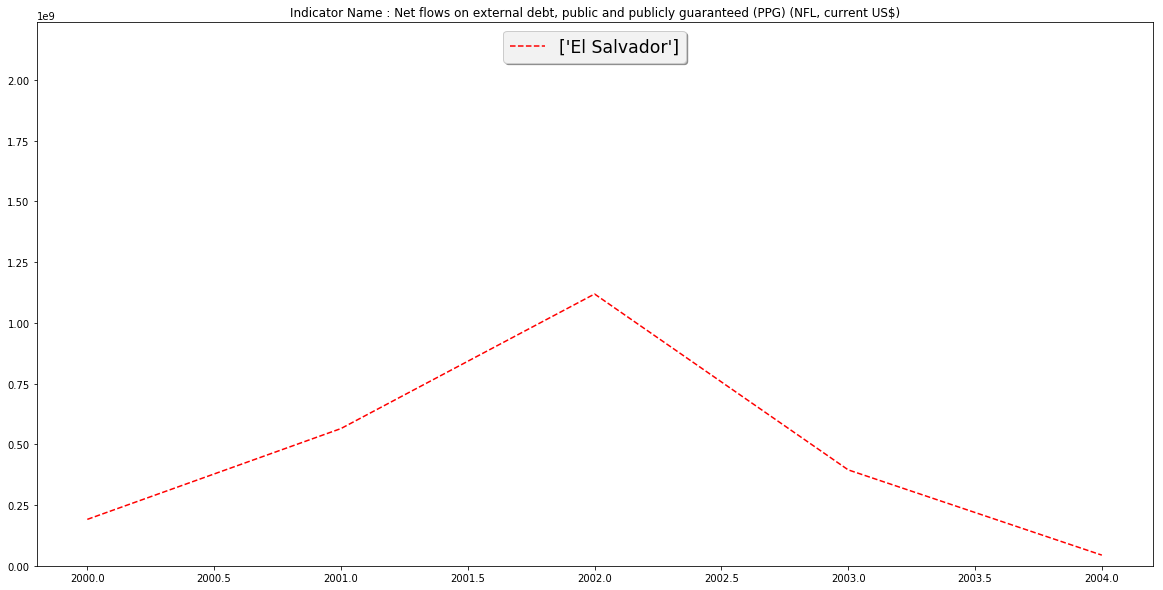

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

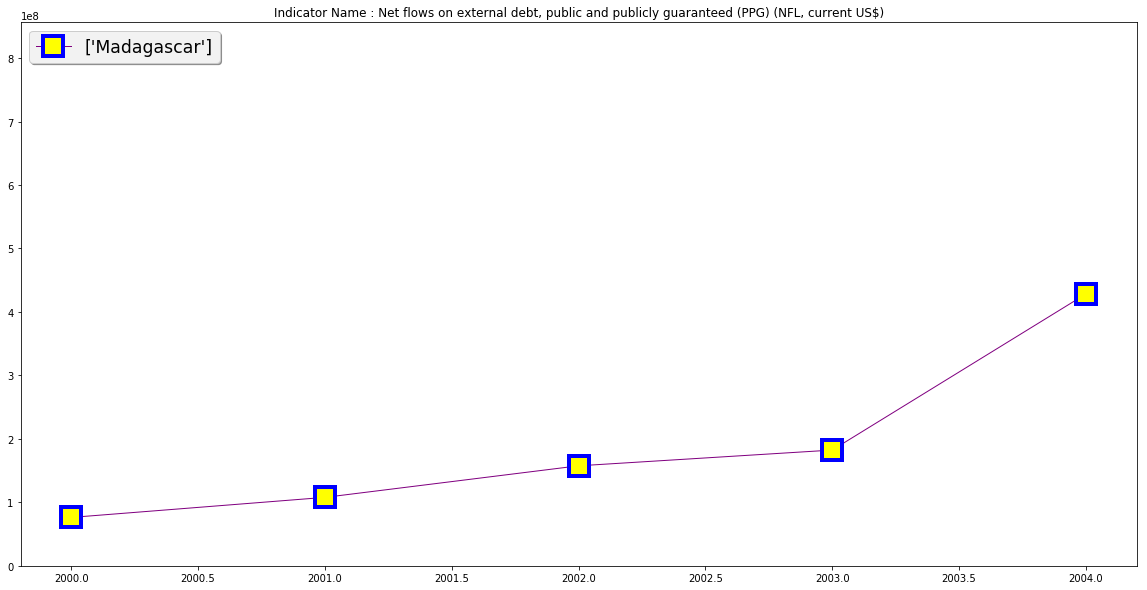

In [51]:
fig, ax = plt.subplots(figsize=(20, 10))

# Adjust the lower and upper limit to bring the graph at center
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())

ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', 
         marker='s', markersize=20, 
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

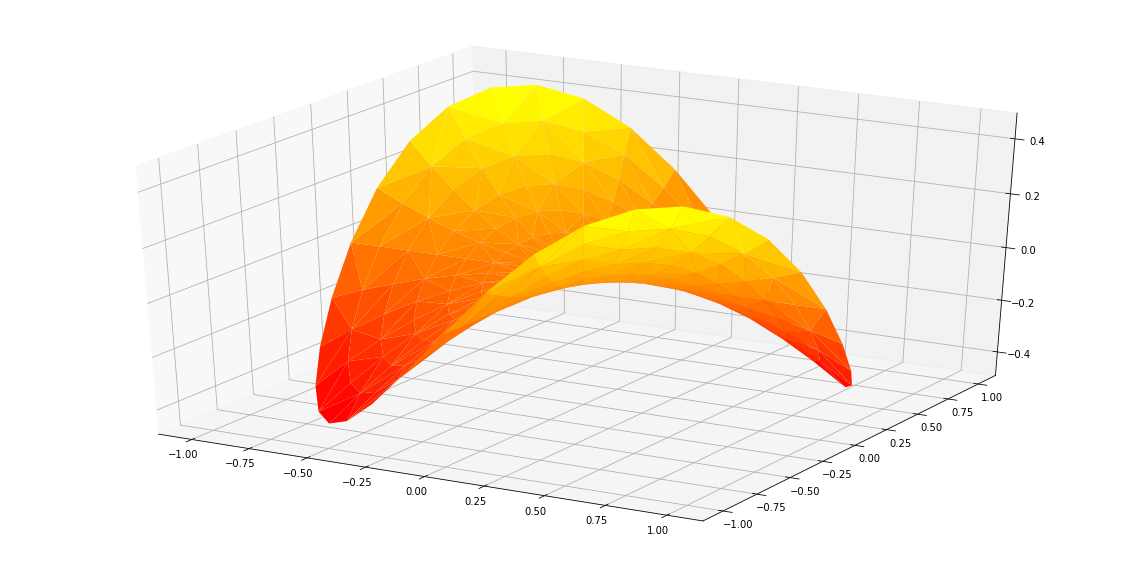

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()

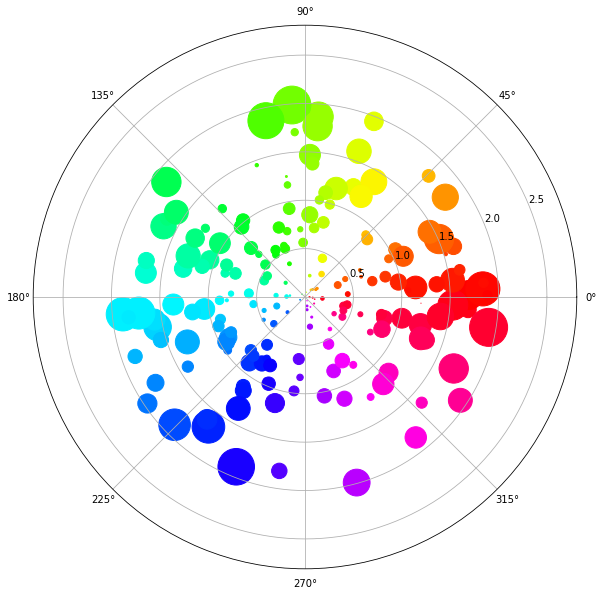

In [54]:
import numpy as np
import matplotlib.pyplot as plt

n_points = 200

radius   = 2 * np.random.rand(n_points)
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)

colors = angles

fig = plt.figure(figsize=(20,10))
ax  = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(1.95)

plt.show()
fig.savefig("vis_bubbleplot.png")

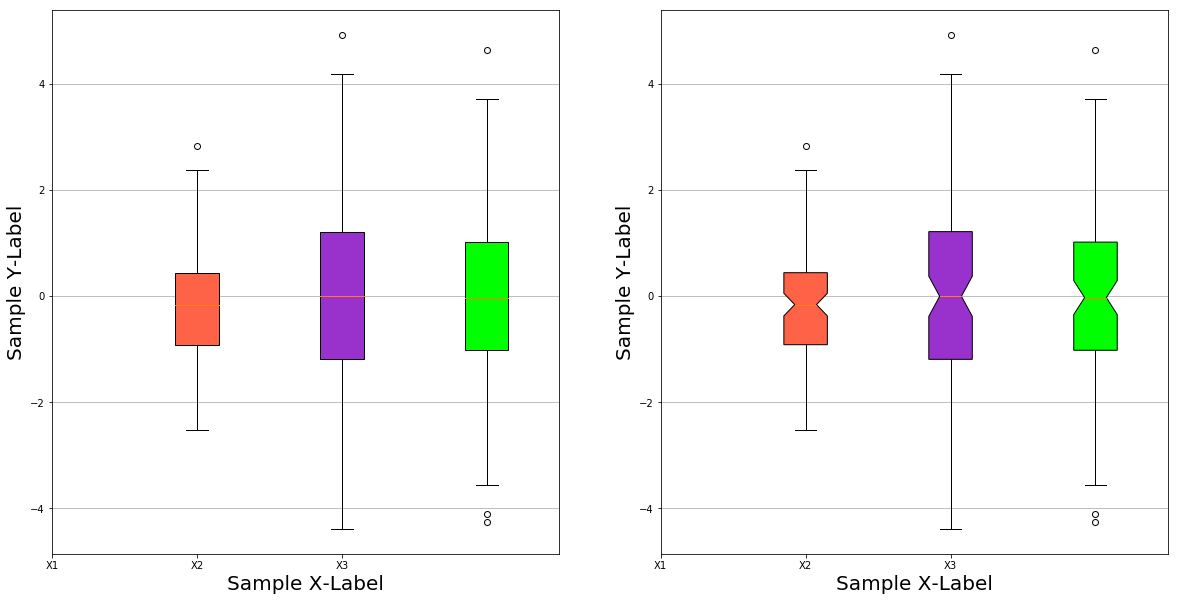

In [55]:
np.random.seed(452)

# Three ararys of 100 points each
A1 = np.random.normal(0, 1, 100)
A2 = np.random.normal(0, 2, 100)
A3 = np.random.normal(0, 1.5, 100)

# Concatenate the three arrays
data = [ A1, A2, A3 ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Box plot: Notch Shape
bplot1 = axes[1].boxplot(data,
                         notch=True,  
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color

# Box plot: Rectangular 
bplot2 = axes[0].boxplot(data,
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color




colors = ['tomato', 'darkorchid', 'lime']
# more colors here: http://matplotlib.org/examples/color/named_colors.html

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Grid lines, Xticks, Xlabel, Ylabel
for axis in axes:
    axis.yaxis.grid(True)
    axis.set_xticks([y for y in range(len(data))], )
    axis.set_xlabel('Sample X-Label',fontsize=20)
    axis.set_ylabel('Sample Y-Label',fontsize=20)

    
# Xtick labels
plt.setp(axes, xticks=[y for y in range(len(data))],
         xticklabels=['X1', 'X2', 'X3'])

plt.show()
fig.savefig("vis_boxplot.png")